# Natural Language Processing Project

In this project I will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

I will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

** Importing libraries and getting the data **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


** Creating a new column called "text length" which is the number of words in the text column **

In [6]:
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


** Using FacetGrid from Seaborn to create a grid of 5 histograms of text length based off of the star ratings **

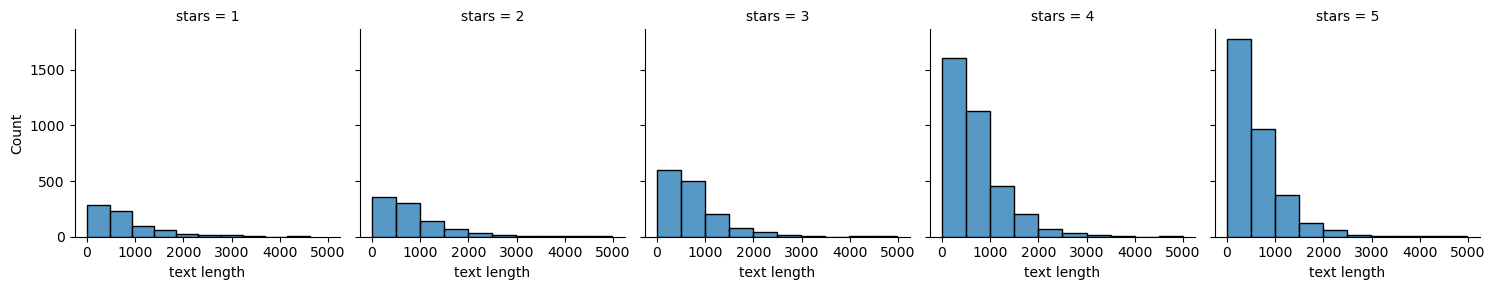

In [7]:
g = sns.FacetGrid(yelp,col="stars")
g.map(sns.histplot,'text length',bins=10)

** Creating a boxplot of text length for each star category **

<Axes: xlabel='stars', ylabel='text length'>

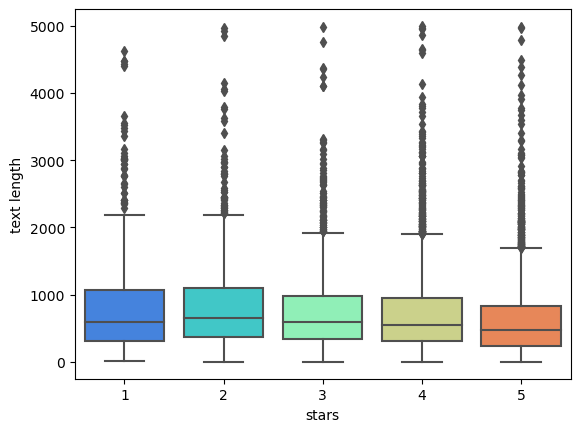

In [8]:
sns.boxplot(data=yelp,x='stars',y='text length',palette='rainbow')

** Creating a countplot of the number of occurrences for each type of star rating **

<Axes: xlabel='stars', ylabel='count'>

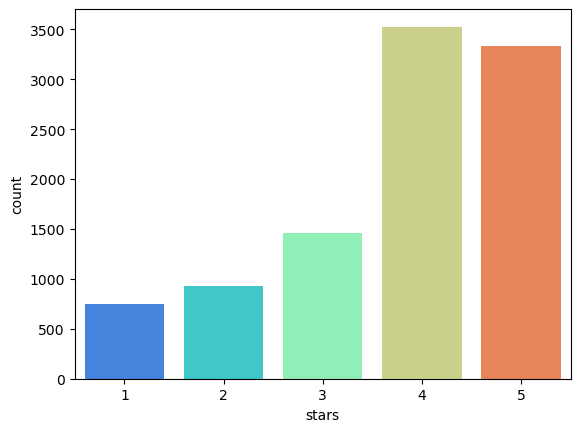

In [9]:
sns.countplot(data=yelp,x='stars',palette='rainbow')

** Using groupby to get the mean values of the numerical columns **

In [10]:
yelp.groupby('stars').mean(numeric_only=True)

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


** Using the corr() method on that groupby dataframe to produce this dataframe **

In [11]:
yelp_corr = yelp.groupby('stars').mean(numeric_only=True).corr()

** Using Seaborn to create a heatmap based off that .corr() dataframe **

<Axes: >

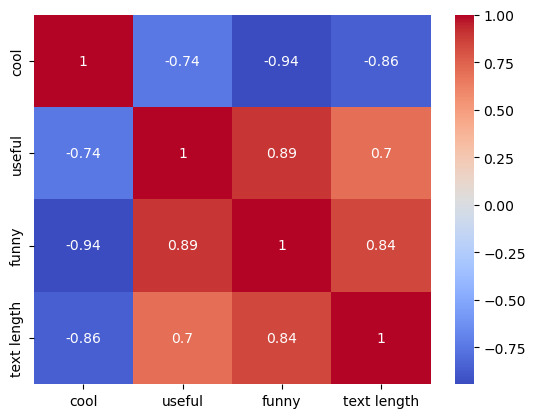

In [12]:
sns.heatmap(yelp_corr,annot=True,cmap='coolwarm')

** Creating a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews **

In [13]:
yelp_class = pd.DataFrame(data=yelp[(yelp['stars'] == 5) | (yelp['stars'] == 1)])
yelp_class.head(15)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,186
10,AsSCv0q_BWqIe3mX2JqsOQ,2010-06-16,E11jzpKz9Kw5K7fuARWfRw,5,The oldish man who owns the store is as sweet ...,review,-OMlS6yWkYjVldNhC31wYg,1,3,1,298
11,e9nN4XxjdHj4qtKCOPq_vg,2011-10-21,3rPt0LxF7rgmEUrznoH22w,5,Wonderful Vietnamese sandwich shoppe. Their ba...,review,C1rHp3dmepNea7XiouwB6Q,1,1,0,321
12,h53YuCiIDfEFSJCQpk8v1g,2010-01-11,cGnKNX3I9rthE0-TH24-qA,5,They have a limited time thing going on right ...,review,UPtysDF6cUDUxq2KY-6Dcg,1,2,0,433
17,O510Re68mOy9dU490JTKCg,2010-05-03,j4SIzrIy0WrmW4yr4--Khg,5,okay this is the best place EVER! i grew up sh...,review,u1KWcbPMvXFEEYkZZ0Yktg,0,0,0,363


** Creating two objects X and y. X will be the 'text' column of yelp_class (features) and y will be the 'stars' column of yelp_class (target/labels) **

In [14]:
X = yelp_class['text']
y = yelp_class['stars']

** Importing CountVectorizer and creating a CountVectorizer object **

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

** Using the fit_transform method on the CountVectorizer object and passing in X (the 'text' column). Then overwriting X **

In [16]:
X = vectorizer.fit_transform(X)

** Using train_test_split to split up the data **

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

** Importing MultinomialNB and creating an instance of the estimator called nb **

In [19]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

** Fitting nb using the training data **

In [20]:
nb.fit(X_train,y_train)

MultinomialNB()

** Using the predict method off of nb to predict labels from X_test **

In [21]:
nb_predictions = nb.predict(X_test)

** Creating a confusion matrix and classification report using these predictions and y_test **

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
print(confusion_matrix(y_test,nb_predictions))
print(classification_report(y_test,nb_predictions))

[[159  69]
 [ 22 976]]
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



# Now trying it using TF-IDF and a pipeline

** Importing TfidfTransformer from sklearn **

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer

** Importing Pipeline from sklearn **

In [25]:
from sklearn.pipeline import Pipeline

** Creating a pipeline with the following steps: CountVectorizer(), TfidfTransformer(), MultinomialNB() **

In [26]:
pipeline = Pipeline([
        ('vectorizer', CountVectorizer()),  # strings to token integer counts
        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
        ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
    ])

** Redoing the train test split on the yelp_class object **

In [27]:
X = yelp_class['text']
y = yelp_class['stars']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

** Fitting the pipeline to the training data **

In [28]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

** Using the pipeline to predict from the X_test and creating a classification report and confusion matrix **

In [29]:
pipe_predictions = pipeline.predict(X_test)

In [30]:
print(confusion_matrix(y_test,pipe_predictions))
print(classification_report(y_test,pipe_predictions))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It looks like TF-IDF actually made things worse!

# Now trying it using a pipeline but with no TF-IDF

In [31]:
pipeline = Pipeline([
        ('vectorizer', CountVectorizer()),  # strings to token integer counts
        ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
    ])

In [32]:
X = yelp_class['text']
y = yelp_class['stars']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [33]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [34]:
pipe_predictions = pipeline.predict(X_test)

In [35]:
print(confusion_matrix(y_test,pipe_predictions))
print(classification_report(y_test,pipe_predictions))

[[155  73]
 [ 15 983]]
              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226



This is pretty similar to our first test. It does much better without the TF-IDF.

# Now trying it using a pipeline but with a different classifier (w/ TF-IDF)

In [37]:
from sklearn.svm import SVC

In [38]:
pipeline = Pipeline([
        ('vectorizer', CountVectorizer()),  # strings to token integer counts
        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
        ('classifier', SVC()),  # train on TF-IDF vectors w/ Support Vector Machine classifier
    ])

In [39]:
X = yelp_class['text']
y = yelp_class['stars']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [40]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [41]:
pipe_predictions = pipeline.predict(X_test)

In [42]:
print(confusion_matrix(y_test,pipe_predictions))
print(classification_report(y_test,pipe_predictions))

[[134  94]
 [  6 992]]
              precision    recall  f1-score   support

           1       0.96      0.59      0.73       228
           5       0.91      0.99      0.95       998

    accuracy                           0.92      1226
   macro avg       0.94      0.79      0.84      1226
weighted avg       0.92      0.92      0.91      1226



It looks like using a Support Vector Machine classifier worked much better even with TF-IDF.

# Now trying it using a pipeline but with a different classifier (no TF-IDF)

In [43]:
pipeline = Pipeline([
        ('vectorizer', CountVectorizer()),  # strings to token integer counts
        ('classifier', SVC()),  # train on TF-IDF vectors w/ Support Vector Machine classifier
    ])

In [44]:
X = yelp_class['text']
y = yelp_class['stars']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [45]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('classifier', SVC())])

In [46]:
pipe_predictions = pipeline.predict(X_test)

In [47]:
print(confusion_matrix(y_test,pipe_predictions))
print(classification_report(y_test,pipe_predictions))

[[ 82 146]
 [  2 996]]
              precision    recall  f1-score   support

           1       0.98      0.36      0.53       228
           5       0.87      1.00      0.93       998

    accuracy                           0.88      1226
   macro avg       0.92      0.68      0.73      1226
weighted avg       0.89      0.88      0.86      1226



This seems to be worse than before. 

So it appears that the best predictions came from the pipeline with the Naive Bayes classifier and no TF-IDF, as well as the pipeline with the Support Vector Machine classifier and TF-IDF. However, it is important to note that the "best" predictions depend on what metrics you are looking for.